## Phase 2 : Supervised learning

In [41]:
#needed libraries imports
import pandas as pd
from matplotlib import style
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import precision_score , recall_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [46]:
#reading the dataset after the preprocessing and cleaning in phase #1
df = pd.read_csv(r'./train_after_cleanning.csv')
df.head(5)

,premise,hypothesis,label,premise_vectors,hypothesis_vectors
0,"['and', 'these', 'comments', 'were', 'consider...","['the', 'rules', 'developed', 'in', 'the', 'in...",0,[-2.2779953e-01 -2.1100001e-02 5.5328900e-01 ...,[-0.22748104 -0.03450689 0.564092 -0.687629...
1,"['these', 'are', 'issues', 'that', 'we', 'wres...","['practice', 'groups', 'are', 'not', 'permitte...",2,[-2.2742710e-01 -3.6777418e-02 5.6592155e-01 ...,[-2.2779953e-01 -2.1100001e-02 5.5328900e-01 ...
2,"['you', 'know', 'they', 'cant', 'really', 'def...","['they', 'cant', 'defend', 'themselves', 'beca...",0,[-2.27337718e-01 -4.05399986e-02 5.68953395e-...,[-0.22807117 -0.00966471 0.5440747 -0.666615...
3,"['from', 'cockpit', 'country', 'to', 'st', 'an...","['from', 'st', 'anns', 'bay', 'to', 'cockpit',...",2,[-2.2826132e-01 -1.6600012e-03 5.3762472e-01 ...,[-2.2826132e-01 -1.6600012e-03 5.3762472e-01 ...
4,"['look', 'its', 'your', 'skin', 'but', 'youre'...","['the', 'boss', 'will', 'fire', 'you', 'if', '...",1,[-2.2737969e-01 -3.8772728e-02 5.6752932e-01 ...,[-0.22769913 -0.02532609 0.55669427 -0.679863...


### Data splitting

In [59]:
# # Select the columns containing the premise and hypothesis
# premise = df["premise"]
# hypothesis = df["hypothesis"]

# # Create a CountVectorizer object to encode the textual data
# vectorizer = CountVectorizer()

# # Fit the vectorizer to the textual data and transform it into numerical vectors
# premise_encoded = vectorizer.fit_transform(premise)
# hypothesis_encoded = vectorizer.transform(hypothesis)

# # Concatenate the encoded premise and hypothesis data into a single feature matrix
# features = pd.concat([pd.DataFrame(premise_encoded.toarray()), pd.DataFrame(hypothesis_encoded.toarray())], axis=1)

# # Select the label column containing the relationship between the premise and hypothesis
# labels = df["label"]

In [66]:
#Convert a collection of text documents to a matrix of token counts (premise and hypothesis columns)
vectorizer = CountVectorizer(lowercase=False)
transformer = make_column_transformer((vectorizer, 'premise'), (vectorizer, 'hypothesis'))

x = df[['premise','hypothesis']]
x = transformer.fit_transform(x).toarray()

#splitting data into 80% train and 20% test
Y =df['label']
x_train , x_test , y_train, y_test = train_test_split(x,Y, train_size=0.8, random_state=42)

# Split the data into training, validation, and testing sets using sklearn's train_test_split function

# x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print("x_train size" , x_train.shape)
print("x_test size" , x_test.shape)
print("y_train size" , y_train.shape)
print("y_test size" , y_test.shape)

x_train size (2587, 17601)
x_test size (647, 17601)
y_train size (2587,)
y_test size (647,)


### Data modeling

#### 1. Decision tree model

In [67]:
#initilize the model
clf = DecisionTreeClassifier(random_state=42)

#train the model
clf = clf.fit( x_train, y_train)

#try the model
y_predict = clf.predict(x_test)


In [68]:
#evaluate the model

#checking the model's accuracy
DT_accuracy = accuracy_score(y_predict , y_test)
print("Model's accuracy: {:.2f}%".format(DT_accuracy*100))

#calculate precision 
print('Precision: %.3f' % precision_score(y_test, y_predict ,pos_label='', average='weighted'))

#calculate sensitivity (recall) 
print('Recall: %.3f' % recall_score(y_test, y_predict ,pos_label='' ,average='weighted'))

Model's accuracy: 45.60%
Precision: 0.455
Recall: 0.456


/Users/reefkha/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1295: UserWarning: Note that pos_label (set to '') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/Users/reefkha/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1295: UserWarning: Note that pos_label (set to '') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


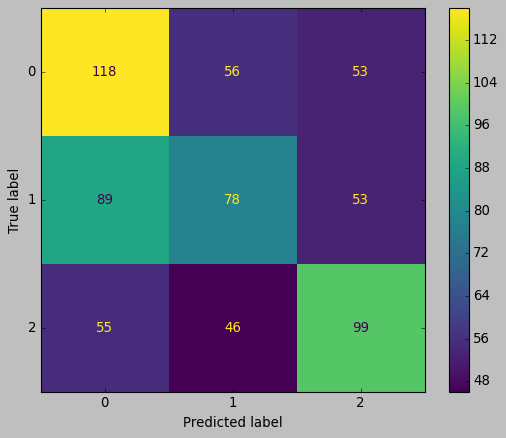

In [69]:
#confusion matrix
style.use('classic')
cm = confusion_matrix(y_test, y_predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=clf.classes_)
disp.plot()

In [70]:
#classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.45      0.52      0.48       227
           1       0.43      0.35      0.39       220
           2       0.48      0.49      0.49       200

    accuracy                           0.46       647
   macro avg       0.46      0.46      0.45       647
weighted avg       0.45      0.46      0.45       647



#### 2. SVC

In [73]:
#initilize the model
svc = SVC()

#train the model
svc.fit(x_train, y_train)

#try the model
y_pred = svc.predict(x_test)

In [74]:
#checking the model's accuracy
SVC_accuracy = accuracy_score(y_test , y_pred)
print("Model's accuracy: {:.2f}%".format(SVC_accuracy*100))

Model's accuracy: 42.04%


In [75]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.56      0.46       227
           1       0.45      0.24      0.31       220
           2       0.45      0.47      0.46       200

    accuracy                           0.42       647
   macro avg       0.43      0.42      0.41       647
weighted avg       0.43      0.42      0.41       647



#### 3. Logistic Regression

In [76]:
#initilize the model
reg = LogisticRegression()

#train the model
reg.fit(x_train, y_train)

#try the model
y_predd = reg.predict(x_test)

#model's accuracy
R_accuracy = accuracy_score(y_predd , y_test)
print("Model's accuracy: {:.2f}%".format(R_accuracy*100))

Model's accuracy: 42.66%


/Users/reefkha/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
#classification report
print(classification_report(y_test, y_predd))

              precision    recall  f1-score   support

           0       0.42      0.44      0.43       227
           1       0.41      0.35      0.37       220
           2       0.46      0.49      0.47       200

    accuracy                           0.43       647
   macro avg       0.43      0.43      0.43       647
weighted avg       0.43      0.43      0.42       647



#### 4. Neural network 

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
# Define the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set up early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Train the model on the training data
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stop])

# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

/Users/reefkha/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:513: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.object,


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations